# Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
from scipy import stats

# Loading Dataset

In [2]:
df = pd.read_csv('train_dataset.csv')

In [3]:
dfc=df.copy()

In [4]:
dfc

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7135,1654,CL,D-penicillamine,19581,F,N,N,Y,N,0.3,279.0,2.96,84.0,1500.8,99.43,109.0,293.0,10.2,4.0
1,7326,41,C,D-penicillamine,22880,F,NaN,N,NaN,N,0.3,NaN,2.96,NaN,1835.4,26.35,131.0,308.0,10.8,1.0
2,7254,297,D,NaN,27957,F,N,N,NaN,N,0.3,328.0,2.64,4.0,NaN,NaN,116.0,194.0,10.3,3.0
3,3135,1872,C,D-penicillamine,21111,F,NaN,Y,Y,N,0.3,302.0,2.02,49.0,NaN,26.35,NaN,NaN,10.5,4.0
4,2483,939,CL,D-penicillamine,18061,F,NaN,NaN,NaN,N,0.5,344.0,3.11,91.0,NaN,104.56,NaN,306.0,11.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,4622,1762,C,Placebo,20909,M,NaN,N,NaN,N,0.9,360.0,2.43,NaN,3444.4,131.59,130.0,314.0,12.9,1.0
6796,4446,2955,C,Placebo,28650,F,Y,N,N,N,0.3,NaN,2.99,43.0,NaN,NaN,238.0,399.0,10.6,4.0
6797,4082,584,C,NaN,24102,F,N,Y,NaN,N,0.3,218.0,2.79,NaN,NaN,26.35,123.0,103.0,9.3,1.0
6798,2248,1426,CL,D-penicillamine,19791,F,N,NaN,Y,N,0.3,NaN,1.96,12.0,289.0,72.95,134.0,354.0,10.6,2.0


# About the dataset

1) ID: Unique Identifier

2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time.

3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)

4) Drug: type of the drug. D-penicillamine or placebo

5) Age: age in [days]

6) Sex: M (male) or F (female)

7) Ascites: presence of ascites N (No) or Y (Yes)

8) Hepatomegaly: the presence of hepatomegaly N (No) or Y (Yes)

9) Spiders: the presence of spiders N (No) or Y (Yes)

10) Edema: the presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)

11) Bilirubin: serum bilirubin in [mg/dl]

12) Cholesterol: serum cholesterol in [mg/dl]

13) Albumin: albumin in [gm/dl]

14) Copper: urine copper in [ug/day]

15) Alk_Phos: alkaline phosphatase in [U/liter]

16) SGOT: SGOT in [U/ml]

17) Tryglicerides: triglicerides in [mg/dl]

18) Platelets: platelets per cubic [ml/1000]

19) Prothrombin: prothrombin time in seconds [s]

20) Stage: histologic stage of disease (1, 2, 3, or 4)

## Data Analysis

In [5]:
for i in dfc.columns:
    print('Unique Values in {} are {}'.format(i,len(dfc[i].unique())))

Unique Values in ID are 6800
Unique Values in N_Days are 3069
Unique Values in Status are 3
Unique Values in Drug are 3
Unique Values in Age are 4744
Unique Values in Sex are 2
Unique Values in Ascites are 3
Unique Values in Hepatomegaly are 3
Unique Values in Spiders are 3
Unique Values in Edema are 3
Unique Values in Bilirubin are 203
Unique Values in Cholesterol are 457
Unique Values in Albumin are 257
Unique Values in Copper are 278
Unique Values in Alk_Phos are 3608
Unique Values in SGOT are 3130
Unique Values in Tryglicerides are 269
Unique Values in Platelets are 499
Unique Values in Prothrombin are 69
Unique Values in Stage are 4


In [6]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6800 entries, 0 to 6799
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             6800 non-null   int64  
 1   N_Days         6800 non-null   int64  
 2   Status         6800 non-null   object 
 3   Drug           4775 non-null   object 
 4   Age            6800 non-null   int64  
 5   Sex            6800 non-null   object 
 6   Ascites        4554 non-null   object 
 7   Hepatomegaly   4373 non-null   object 
 8   Spiders        4210 non-null   object 
 9   Edema          6800 non-null   object 
 10  Bilirubin      6800 non-null   float64
 11  Cholesterol    3699 non-null   float64
 12  Albumin        6800 non-null   float64
 13  Copper         4644 non-null   float64
 14  Alk_Phos       4302 non-null   float64
 15  SGOT           4698 non-null   float64
 16  Tryglicerides  3988 non-null   float64
 17  Platelets      6462 non-null   float64
 18  Prothrom

**INSIGHTS**
1. Drug, Ascites, Hepatomegaly, Spiders are the features having null values and have object datatype so we will fill those nan values with the most occurring value.
2. Cholesterol, Copper, Alk_Phos, SGOT, Tryglicerides, Platelets and Prothrombin are the features having float as their datatype so we will fill the non null values of these columns with their respective median or mean values.

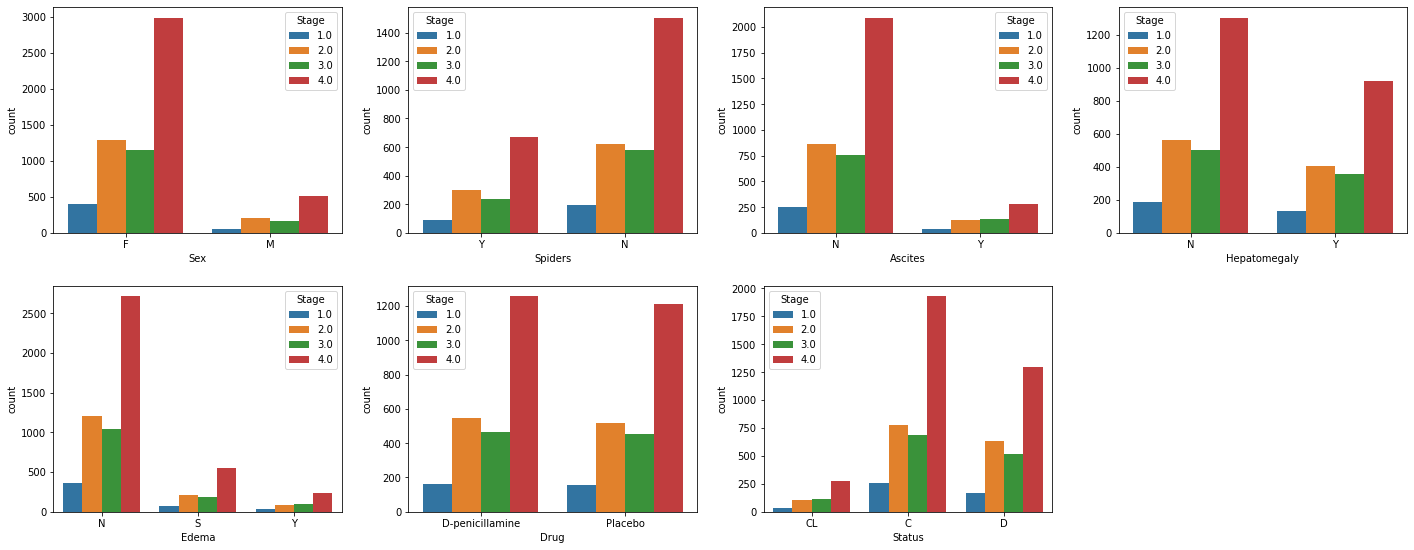

In [7]:
colmns=['Sex','Spiders','Ascites','Hepatomegaly','Edema','Drug','Status']
plt.figure(figsize=(20,8))
for i,col in enumerate(colmns):
    ax = plt.subplot(2,4, i+1)
    sns.countplot(x=col,hue='Stage',data=dfc,ax=ax)
plt.tight_layout(pad=2)
plt.show()

**INSIGHTS**
1. Females are more prone to liver diseases in comparison to males and that too at stage 4.
2. It is considered that many patients doesn't have presence of Ascites, Spiders, Edema and Hepatomegaly but still got affected with liver disease.
3. The status of many patients is censored and in considerable amount some patients have led to death.
4. Type of drug given to the patients are having somewhat equal effect but D-penicillamine is having a bit more comparatively.

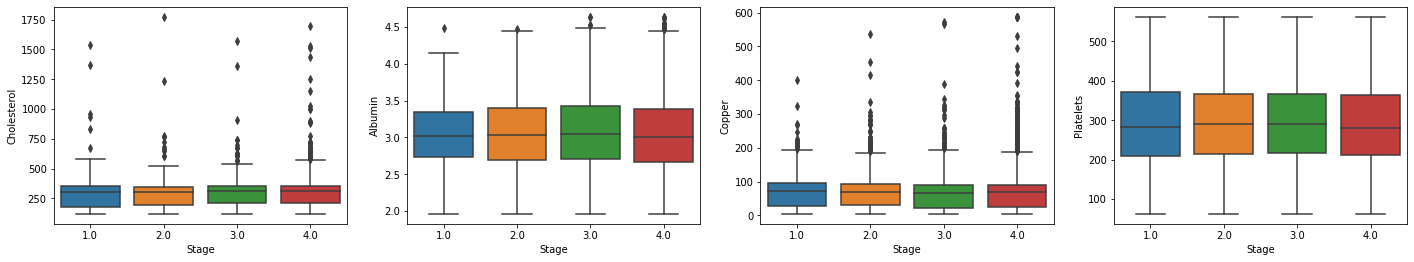

In [8]:
columns=['Cholesterol','Albumin','Copper','Platelets']
plt.figure(figsize=(20,4))
for i,col in enumerate(columns):
    ax = plt.subplot(1,4, i+1)
    sns.boxplot(y=col,x='Stage',data=dfc,ax=ax)
plt.tight_layout(pad=2)
plt.show()

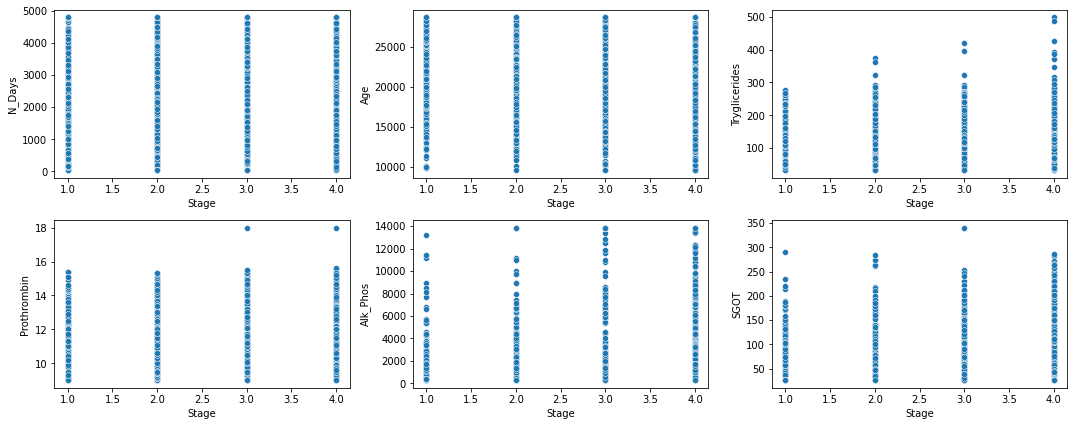

In [9]:
cols=['N_Days','Age','Tryglicerides','Prothrombin','Alk_Phos','SGOT']
plt.figure(figsize=(15,6))
for i,col in enumerate(cols):
    ax = plt.subplot(2,3, i+1)
    sns.scatterplot(y=col,x='Stage',data=dfc,ax=ax)
plt.tight_layout(pad=1)
plt.show()

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


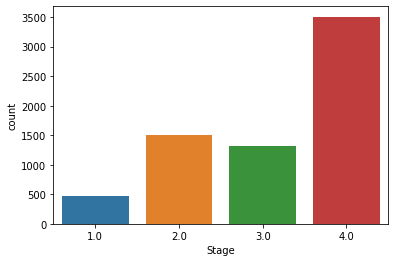

In [10]:
sns.countplot(df['Stage'],label="Count")
plt.show()


**INSIGHTS**
* Mostly Patients are at the last stage of the disease i.e. stage 4.

## Data Cleansing 

In [11]:
dfc["Cholesterol"] = np. where(dfc["Cholesterol"]>900, 312.00, dfc["Cholesterol"])
dfc["Albumin"] = np. where(dfc["Albumin"]>4.5, 3.02, dfc["Albumin"])
dfc["Copper"] = np. where(dfc["Copper"]>350, 68, dfc["Copper"])

In [12]:
#Dropping duplicate rows
dfc.drop_duplicates(inplace=True)

In [13]:
#Dropping unnecessary column
dfc.drop(['ID'],axis=1,inplace=True)

In [14]:
dfc = dfc.loc[dfc['Age']>0]
dfc = dfc.loc[dfc['N_Days']>0]
dfc = dfc.loc[dfc['Stage']>0]

In [15]:
dfc.shape

(6800, 19)

In [16]:
dfc.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,6800.000000,6800.000000,6800.000000,3699.000000,6800.000000,4644.000000,4302.000000,4698.000000,3988.000000,6462.000000,6645.000000,6800.000000
mean,1664.055441,22863.223529,1.806147,289.809678,3.033596,66.551249,1802.951464,79.554427,133.857823,293.306097,11.231031,3.157206
std,1332.308135,4671.135682,3.218009,105.779486,0.524495,51.569660,1618.550339,43.433832,47.291444,115.146088,1.123444,0.993059
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,537.000000,19416.500000,0.300000,204.000000,2.680000,26.000000,1122.650000,35.290000,114.000000,213.000000,10.500000,2.000000
50%,1443.000000,23367.000000,0.400000,312.000000,3.020000,68.000000,1563.150000,88.505000,128.000000,285.000000,11.100000,4.000000
75%,2519.000000,27125.500000,1.800000,352.000000,3.390000,91.000000,2013.250000,110.672500,141.000000,365.000000,11.700000,4.000000
max,4795.000000,28650.000000,28.000000,899.000000,4.490000,344.000000,13862.400000,340.480000,498.000000,563.000000,18.000000,4.000000


In [17]:
dfc['Cholesterol']= dfc['Cholesterol'].replace(np.nan,312.00)
dfc['Copper']= dfc['Copper'].replace(np.nan,68.00)
dfc['Alk_Phos']= dfc['Alk_Phos'].replace(np.nan,1563)
dfc['SGOT']= dfc['SGOT'].replace(np.nan,88.505)
dfc['Tryglicerides']= dfc['Tryglicerides'].replace(np.nan,128.00)
dfc['Platelets']= dfc['Platelets'].replace(np.nan,285.00)
dfc['Prothrombin']= dfc['Prothrombin'].replace(np.nan,11.1)
dfc['Spiders']=dfc['Spiders'].replace(np.nan,'N')
dfc['Ascites']=dfc['Ascites'].replace(np.nan,'N')
dfc['Hepatomegaly']=dfc['Hepatomegaly'].replace(np.nan,'N')
dfc['Drug']=dfc['Drug'].replace(np.nan,'D-penicillamine')

dfc['Cholesterol']= dfc['Cholesterol'].replace(np.nan,None)
dfc['Copper']= dfc['Copper'].replace(np.nan,None)
dfc['Alk_Phos']= dfc['Alk_Phos'].replace(np.nan,None)
dfc['SGOT']= dfc['SGOT'].replace(np.nan,None)
dfc['Tryglicerides']= dfc['Tryglicerides'].replace(np.nan,None)
dfc['Platelets']= dfc['Platelets'].replace(np.nan,None)
dfc['Prothrombin']= dfc['Prothrombin'].replace(np.nan,None)
dfc['Spiders']=dfc['Spiders'].replace(np.nan,'N')
dfc['Ascites']=dfc['Ascites'].replace(np.nan,'N')
dfc['Hepatomegaly']=dfc['Hepatomegaly'].replace(np.nan,'N')
dfc['Drug']=dfc['Drug'].replace(np.nan,'D-penicillamine')

In [18]:
#dfc=pd.get_dummies(dfc,columns=['Sex','Drug','Status','Ascites','Hepatomegaly','Spiders','Edema'],drop_first=True)
le = LabelEncoder()
dfc['Sex'] = le.fit_transform(dfc['Sex'])
dfc['Drug'] = le.fit_transform(dfc['Drug'])
dfc['Ascites'] = le.fit_transform(dfc['Ascites'])
dfc['Hepatomegaly'] = le.fit_transform(dfc['Hepatomegaly'])
dfc['Spiders'] = le.fit_transform(dfc['Spiders'])
dfc['Status'] = le.fit_transform(dfc['Status'])
dfc['Edema'] = le.fit_transform(dfc['Edema'])
dfc   

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1654,1,0,19581,0,0,0,1,0,0.3,279.0,2.96,84.0,1500.8,99.430,109.0,293.0,10.2,4.0
1,41,0,0,22880,0,0,0,0,0,0.3,312.0,2.96,68.0,1835.4,26.350,131.0,308.0,10.8,1.0
2,297,2,0,27957,0,0,0,0,0,0.3,328.0,2.64,4.0,1563.0,88.505,116.0,194.0,10.3,3.0
3,1872,0,0,21111,0,0,1,1,0,0.3,302.0,2.02,49.0,1563.0,26.350,128.0,285.0,10.5,4.0
4,939,1,0,18061,0,0,0,0,0,0.5,344.0,3.11,91.0,1563.0,104.560,128.0,306.0,11.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6795,1762,0,1,20909,1,0,0,0,0,0.9,360.0,2.43,68.0,3444.4,131.590,130.0,314.0,12.9,1.0
6796,2955,0,1,28650,0,1,0,0,0,0.3,312.0,2.99,43.0,1563.0,88.505,238.0,399.0,10.6,4.0
6797,584,0,0,24102,0,0,1,0,0,0.3,218.0,2.79,68.0,1563.0,26.350,123.0,103.0,9.3,1.0
6798,1426,1,0,19791,0,0,0,1,0,0.3,312.0,1.96,12.0,289.0,72.950,134.0,354.0,10.6,2.0


1. In column Sex_M; 0:Female & 1:Male 
2. In Drug_Placebo; 0:D-penicillamine & 1:Placebo
3. In Status_CL and Status_D; 0-0:C(censored) & 1-0:CL(censored due to liver xt) & 0-1:D(death)
4. In Ascites_Y, Hepatomegaly_Y, Spiders_Y;  0:no & 1:yes
5. In Edema_S, Edema_Y; 0-0:N (no edema and no diuretic therapy for edema) & 1-0:S (edema present without diuretics, or edema resolved by diuretics) & 0-1:Y(edema despite diuretic therapy) 

#### Finding Correlation 

<AxesSubplot:>

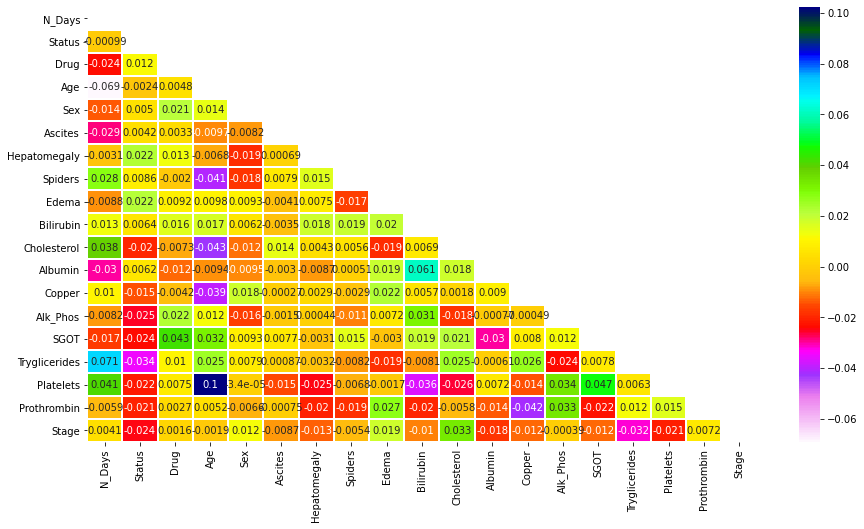

In [19]:
plt.figure(figsize=(15,8))
mask =  np.triu(np.ones_like(dfc.corr()))
sns.heatmap(dfc.corr(),mask=mask,annot=True,cmap='gist_ncar_r',linewidth=0.2)

## Handling Test Data

In [20]:
df_test = pd.read_csv('test_dataset.csv')
dft = df_test.copy()

In [21]:
dft['Sex'] = le.fit_transform(dft['Sex'])
dft['Drug'] = le.fit_transform(dft['Drug'])
dft['Ascites'] = le.fit_transform(dft['Ascites'])
dft['Hepatomegaly'] = le.fit_transform(dft['Hepatomegaly'])
dft['Spiders'] = le.fit_transform(dft['Spiders'])
dft['Status'] = le.fit_transform(dft['Status'])
dft['Edema'] = le.fit_transform(dft['Edema'])
dft.drop(['ID'],axis=1,inplace=True)

In [22]:
dft

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
0,41,0,1,22553,0,0,2,0,0,1.4,247.0,3.62,NaN,NaN,108.65,NaN,169.0,11.6
1,1811,0,0,16223,0,0,1,0,0,0.3,311.0,2.80,92.0,1748.1,NaN,129.0,321.0,11.5
2,954,0,0,27100,0,0,0,0,0,0.4,NaN,3.56,NaN,NaN,43.52,NaN,296.0,10.3
3,1969,2,1,17039,0,0,1,0,0,1.2,NaN,3.16,NaN,617.1,113.76,NaN,125.0,10.9
4,2721,2,0,17738,0,2,2,2,0,3.2,NaN,2.36,89.0,1782.4,NaN,129.0,138.0,10.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,4513,2,1,18293,1,2,0,0,1,0.3,NaN,2.75,NaN,2063.9,111.68,NaN,563.0,10.9
3196,3281,2,2,12149,0,0,0,1,0,4.7,422.0,4.30,106.0,1203.2,32.49,166.0,NaN,10.2
3197,1933,2,0,17084,0,2,1,2,0,0.8,408.0,3.56,9.0,2358.1,124.70,131.0,234.0,11.6
3198,2350,2,1,28650,1,2,2,0,2,15.3,258.0,3.21,32.0,1472.7,113.24,130.0,110.0,10.3


In [23]:
dft.isnull().sum()

N_Days              0
Status              0
Drug                0
Age                 0
Sex                 0
Ascites             0
Hepatomegaly        0
Spiders             0
Edema               0
Bilirubin           0
Cholesterol      1435
Albumin             0
Copper           1006
Alk_Phos         1168
SGOT              987
Tryglicerides    1286
Platelets         164
Prothrombin        64
dtype: int64

In [24]:
#dft[dft.Cholesterol>700].value_counts()

In [25]:
#dft.describe()

### Feature Scaling 

In [26]:
from sklearn.preprocessing import StandardScaler
sd =StandardScaler()
col_to_be_std = ['N_Days','Age','Bilirubin','Cholesterol','Albumin','Copper','Alk_Phos','SGOT','Tryglicerides','Prothrombin']
dfc[col_to_be_std]= sd.fit_transform(dfc[col_to_be_std])

In [27]:
#dfc

# Training the model

In [28]:
x = dfc.drop('Stage',axis=1)
y = dfc['Stage']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

### Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
pred_log = logreg.predict(x_test)
acc_log = round(metrics.accuracy_score(y_test,pred_log) * 100, 3)
print('Accuracy using Logistic Regression:',acc_log)

Accuracy using Logistic Regression: 52.721


c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        87
         2.0       0.00      0.00      0.00       310
         3.0       0.00      0.00      0.00       246
         4.0       0.53      1.00      0.69       717

    accuracy                           0.53      1360
   macro avg       0.13      0.25      0.17      1360
weighted avg       0.28      0.53      0.36      1360



c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [31]:
from sklearn.model_selection import GridSearchCV
params_list = {'C': [1.0,10.0],'class_weight': [None],'dual': [False],'fit_intercept': [True],'intercept_scaling': [1],
               'l1_ratio': [None], 'max_iter': [100],'n_jobs': [None,-1],'penalty': ['l1', 'l2', 'elasticnet', 'none'],
               'random_state': [None],'tol': [0.0001],'verbose': [0],'warm_start': [False]}

In [32]:
grid_log = GridSearchCV(LogisticRegression(),params_list, cv=5,n_jobs=-1)
grid_log.fit(x_train, y_train)
pred_grid_log = grid_log.predict(x_test)
acc_grid_log = round(metrics.accuracy_score(y_test,pred_grid_log) * 100, 3)
print('Accuracy using GridSearch CV on LR:',acc_grid_log)

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.51231618        nan 0.5125            nan 0.51231618
        nan 0.5125            nan 0.51213235        nan 0.5125
        nan 0.51213235        nan 0.5125    ]
  warnings.warn(


Accuracy using GridSearch CV on LR: 52.721


c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
print(classification_report(y_test,pred_grid_log))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        87
         2.0       0.00      0.00      0.00       310
         3.0       0.00      0.00      0.00       246
         4.0       0.53      1.00      0.69       717

    accuracy                           0.53      1360
   macro avg       0.13      0.25      0.17      1360
weighted avg       0.28      0.53      0.36      1360



c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Support Vector Classifier 

In [34]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)
acc_svc = round(metrics.accuracy_score(y_test,pred_svc) * 100, 3)
print('Accuracy using Support Vector Classifier:',acc_svc)

Accuracy using Support Vector Classifier: 52.721


In [35]:
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        87
         2.0       0.00      0.00      0.00       310
         3.0       0.00      0.00      0.00       246
         4.0       0.53      1.00      0.69       717

    accuracy                           0.53      1360
   macro avg       0.13      0.25      0.17      1360
weighted avg       0.28      0.53      0.36      1360



c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### K Nearest Neighbour Classifier 

Text(0, 0.5, 'accuracy_rate')

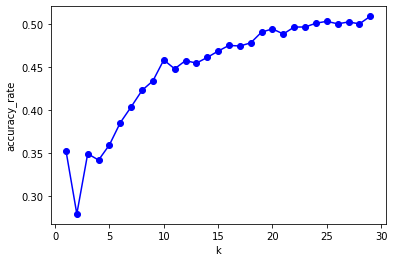

In [36]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_rate = []
from sklearn import metrics
for i in range (1,30):
    knn = KNeighborsClassifier(n_neighbors=i).fit(x_train,y_train)
    pred_knn = knn.predict(x_test)
    accuracy_rate.append(metrics.accuracy_score(y_test,pred_knn))

plt.plot(range(1,30),accuracy_rate,'b-o')
plt.xlabel('k')
plt.ylabel('accuracy_rate')

In [37]:
knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(x_train, y_train)
pred_knn = knn.predict(x_test)
acc_knn = round(metrics.accuracy_score(y_test,pred_knn) * 100, 3)
print('Accuracy using K Neighbour Classifier:',acc_knn)

Accuracy using K Neighbour Classifier: 50.662


In [38]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        87
         2.0       0.23      0.03      0.05       310
         3.0       0.21      0.03      0.05       246
         4.0       0.52      0.94      0.67       717

    accuracy                           0.51      1360
   macro avg       0.24      0.25      0.19      1360
weighted avg       0.37      0.51      0.37      1360



c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [52]:
knn_params = {'n_neighbors': list(range(3, 30, 2)),
          'weights':['uniform', 'distance'],
          'metric':['euclidean', 'manhattan']}
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params, scoring='accuracy', cv=10, n_jobs=-1) 
grid_knn.fit(x_train, y_train)
print(grid_knn.best_params_ )

{'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'distance'}


In [40]:
gridknn = KNeighborsClassifier(metric= 'euclidean', n_neighbors= 19, weights= 'distance')
gridknn.fit(x_train, y_train)
pred_grid_knn = gridknn.predict(x_test)
acc_grid_knn = round(metrics.accuracy_score(y_test,pred_grid_knn) * 100, 3)
print('Accuracy using GridSearch CV on KNN:',acc_grid_knn)
print(classification_report(y_test, pred_grid_knn))

Accuracy using GridSearch CV on KNN: 48.897
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        87
         2.0       0.24      0.07      0.11       310
         3.0       0.18      0.04      0.07       246
         4.0       0.52      0.88      0.66       717

    accuracy                           0.49      1360
   macro avg       0.23      0.25      0.21      1360
weighted avg       0.36      0.49      0.38      1360



c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Decision Tree 

In [41]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=10)
decision_tree.fit(x_train, y_train)
pred_decision_tree = decision_tree.predict(x_test)
acc_decision_tree  = round(metrics.accuracy_score(y_test,pred_decision_tree ) * 100, 3)
print('Accuracy using Decision Tree:',acc_decision_tree)

Accuracy using Decision Tree: 35.0


In [42]:
print(classification_report(y_test,pred_decision_tree))

              precision    recall  f1-score   support

         1.0       0.06      0.08      0.07        87
         2.0       0.23      0.26      0.24       310
         3.0       0.19      0.21      0.20       246
         4.0       0.53      0.47      0.50       717

    accuracy                           0.35      1360
   macro avg       0.25      0.25      0.25      1360
weighted avg       0.37      0.35      0.36      1360



### Random Forest 

In [53]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100,random_state=100)
random_forest.fit(x_train, y_train)
pred_random_forest = random_forest.predict(x_test)
acc_random_forest  = round(metrics.accuracy_score(y_test,pred_random_forest) * 100, 3)
print('Accuracy using Random Forest:',acc_random_forest )

Accuracy using Random Forest: 51.029


In [54]:
print(classification_report(y_test,pred_random_forest))

              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        87
         2.0       0.19      0.02      0.04       310
         3.0       0.14      0.01      0.02       246
         4.0       0.52      0.96      0.68       717

    accuracy                           0.51      1360
   macro avg       0.21      0.25      0.18      1360
weighted avg       0.35      0.51      0.37      1360



c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [45]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
criterion = ['gini','entropy']
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                               scoring='accuracy',
                              n_iter=10,cv=5,verbose=0,random_state=0,n_jobs=-1)

rf_random.fit(x_train,y_train)
rf_random.best_params_

{'n_estimators': 522,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': False}

In [46]:
rand_search = RandomForestClassifier(n_estimators=200, min_samples_split=10,min_samples_leaf=2,max_features='sqrt',
 max_depth=50,bootstrap = True)
rand_search.fit(x_train,y_train)
pred_rand_search = rand_search.predict(x_test)
acc_rand_search = round(metrics.accuracy_score(y_test,pred_rand_search) * 100, 3)
print('Accuracy using Randomized Search:',acc_rand_search)
print(classification_report(y_test, pred_rand_search))

Accuracy using Randomized Search: 52.647
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00        87
         2.0       0.33      0.00      0.01       310
         3.0       0.14      0.00      0.01       246
         4.0       0.53      1.00      0.69       717

    accuracy                           0.53      1360
   macro avg       0.25      0.25      0.18      1360
weighted avg       0.38      0.53      0.37      1360



c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### Naive Bayes 

In [47]:
#from sklearn.naive_bayes import MultinomialNB
#clf = MultinomialNB().fit(x_train, y_train)
#clf.fit(x_train, y_train)
#pred_naive_bayes = clf.predict(x_test)
#acc_naive_bayes  = round(metrics.accuracy_score(y_test,pred_naive_bayes) * 100, 3)
#print('Accuracy using naive bayes:',acc_naive_bayes )

### XGBoost

In [48]:
import xgboost as xgb
xgb = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=3,min_child_weight=1, monotone_constraints='()',
              n_estimators=350, n_jobs=-1, num_parallel_tree=1,objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,tree_method='exact', validate_parameters=1, verbosity=None)
xgb.fit(x_train, y_train)
pred_xgb = xgb.predict(x_test)
acc_xgb  = round(metrics.accuracy_score(y_test,pred_xgb) * 100, 3)
print('Accuracy using xgboost:',acc_xgb )

c:\users\chira\appdata\local\programs\python\python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:18:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy using xgboost: 46.324


In [49]:
print(classification_report(y_test,pred_xgb))

              precision    recall  f1-score   support

         1.0       0.06      0.01      0.02        87
         2.0       0.26      0.11      0.16       310
         3.0       0.13      0.06      0.08       246
         4.0       0.53      0.81      0.64       717

    accuracy                           0.46      1360
   macro avg       0.24      0.25      0.22      1360
weighted avg       0.36      0.46      0.39      1360



### Predictions on given Dataset 

In [50]:
predictions = xgb.predict(dft)

In [51]:
predictions.shape

(3200,)

gender= {'M':1,'F':0}
drug={'D-penicillamine':0,'Placebo':1}
status={'C':0,'CL':1,'D':2}
ascites={'N':0,'Y':1}
hepatomegaly={'N':0,'Y':1}
spiders={'N':0,'Y':1}
edema={'N':0,'S':1,'Y':2}
dfc['Sex']=dfc['Sex'].map(gender)
dfc['Drug']=dfc['Drug'].map(drug)
dfc['Status']=dfc['Status'].map(status)
dfc['Ascites']=dfc['Ascites'].map(ascites)
dfc['Hepatomegaly']=dfc['Hepatomegaly'].map(hepatomegaly)
dfc['Spiders']=dfc['Spiders'].map(spiders)
dfc['Edema']=dfc['Edema'].map(edema)

fig,axes = plt.subplots(2,4,figsize=(20,10))
axes[1,3].text(0.5,0.5,s='Number of patients based on\n the stage of disease',horizontalalignment='center',
               verticalalignment='center',fontsize=12, fontweight='bold',fontfamily='monospace',color="#000000")
axes[0,0].set_title('Stage count plot based on Sex ')
sns.countplot(x='Sex',hue='Stage', data=dfc, ax=axes[0,0]);    
axes[0,1].set_title('Stage count plot based on type of Drug')
sns.countplot(x='Drug',hue='Stage', data=dfc, ax=axes[0,1]);
axes[0,2].set_title('Stage count plot based on status')
sns.countplot(x='Status',hue='Stage', data=dfc, ax=axes[0,2]);
axes[0,3].set_title('Stage count plot based on edema')
sns.countplot(x='Edema',hue='Stage', data=dfc, ax=axes[0,3]);
axes[1,0].set_title('Stage count plot based on spiders ')
sns.countplot(x='Spiders',hue='Stage', data=dfc, ax=axes[1,0]);
axes[1,1].set_title('Stage count plot based on ascites')
sns.countplot(x='Ascites',hue='Stage', data=dfc, ax=axes[1,1]);
axes[1,2].set_title('Stage count plot based on Hepatomegaly')
sns.countplot(x='Hepatomegaly',hue='Stage', data=dfc, ax=axes[1,2]);


plt.tight_layout(pad=2);